In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [4]:
bacc= pd.read_csv("./data/baccarat_results.csv")
baccbead= pd.read_csv("./data/bead_road.csv", header=None, names=["Result"])

In [5]:
bacc.head()

,Player Hand,Player Total,Banker Hand,Banker Total,Result
0,"['8', '9']",7,"['6', 'K']",6,Player wins
1,"['K', '6']",6,"['K', '6', 'Q']",6,Tie
2,"['Q', '8']",8,"['6', 'Q']",6,Player wins
3,"['A', '2', '2']",5,"['9', '4', 'Q']",3,Player wins
4,"['5', 'A']",6,"['8', 'K']",8,Banker wins


In [6]:
bacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player Hand   10000 non-null  object
 1   Player Total  10000 non-null  int64 
 2   Banker Hand   10000 non-null  object
 3   Banker Total  10000 non-null  int64 
 4   Result        10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [7]:
bacc.describe()

,Player Total,Banker Total
count,10000.000000,10000.000000
mean,5.311400,5.274500
std,2.895871,2.764112
min,0.000000,0.000000
25%,3.000000,3.000000
50%,6.000000,6.000000
75%,8.000000,8.000000
max,9.000000,9.000000


In [8]:
bacc["Result"].value_counts()

Result
Player wins    4447
Banker wins    4437
Tie            1116
Name: count, dtype: int64

In [9]:
# Count occurrences of each result
bacc["Result"].value_counts(normalize=True) * 100

Result
Player wins    44.47
Banker wins    44.37
Tie            11.16
Name: proportion, dtype: float64

In [10]:
result = bacc["Result"].value_counts()

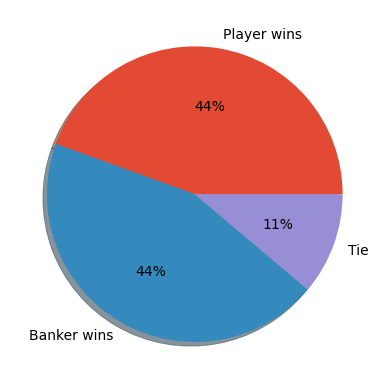

In [11]:
plt.pie(result.values, labels = result.index, autopct = "%.0f%%", shadow = True)
plt.show()

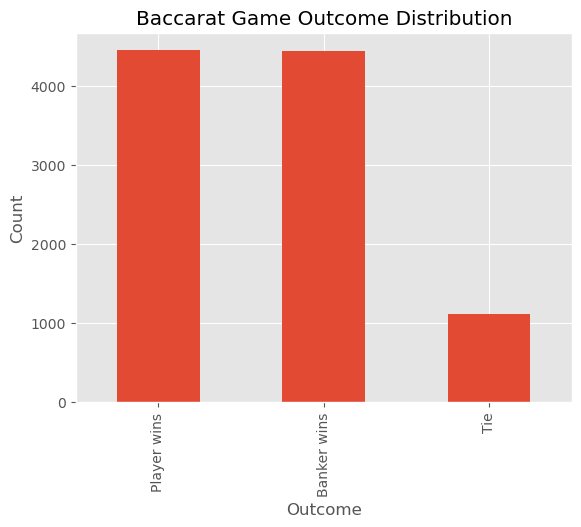

In [12]:
# Plot result distribution
bacc["Result"].value_counts().plot(kind="bar", title="Baccarat Game Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

### Patern Analysis


In [15]:
bacc["Previous Result"] = bacc["Result"].shift(1)  # Create a new column with previous result

In [17]:
bacc[bacc["Previous Result"] == "Banker wins"]["Result"].value_counts(normalize=True) * 100

Result
Banker wins    44.331756
Player wins    44.196529
Tie            11.471715
Name: proportion, dtype: float64

In [24]:
bacc[bacc["Previous Result"] == "Player wins"]["Result"].value_counts(normalize=True) * 100

Result
Player wins    44.849303
Banker wins    44.129555
Tie            11.021143
Name: proportion, dtype: float64

In [26]:
bacc[bacc["Previous Result"] == "Tie"]["Result"].value_counts(normalize=True) * 100

Result
Banker wins    45.519713
Player wins    43.996416
Tie            10.483871
Name: proportion, dtype: float64

In [27]:
transition_matrix = bacc.groupby(["Previous Result", "Result"]).size().unstack()
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100  # Normalize to percentages

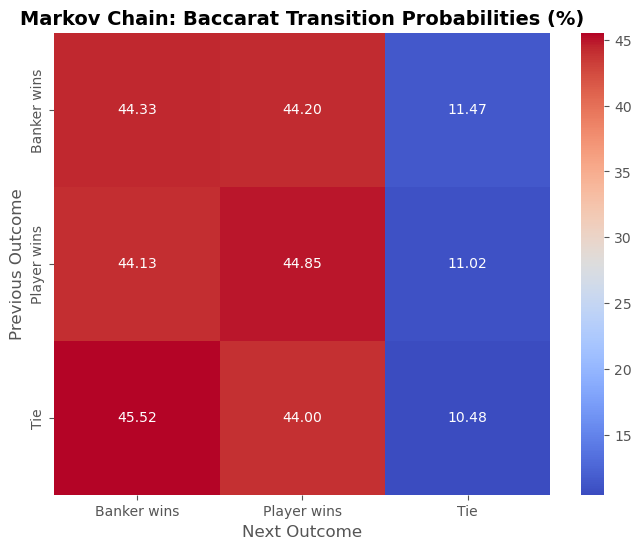

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Markov Chain: Baccarat Transition Probabilities (%)", fontsize=14, fontweight="bold")
plt.xlabel("Next Outcome", fontsize=12)
plt.ylabel("Previous Outcome", fontsize=12)
plt.show()

print("\n📊 Markov Transition Matrix (Probabilities %):\n", transition_matrix)

In [37]:
# Find streaks
bacc["Win Streak"] = (bacc["Result"] != bacc["Result"].shift()).cumsum()
streak_counts = bacc.groupby(["Win Streak", "Result"]).size().reset_index(name="Count")

# Find longest streak for each type
streak_counts.groupby("Result")["Count"].max()

Result
Banker wins     9
Player wins    11
Tie             4
Name: Count, dtype: int64

## plotting original data in to a 'Beadroad' style

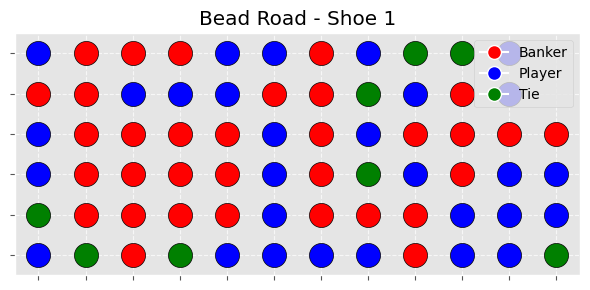

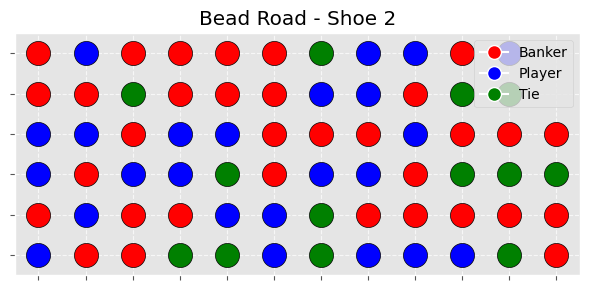

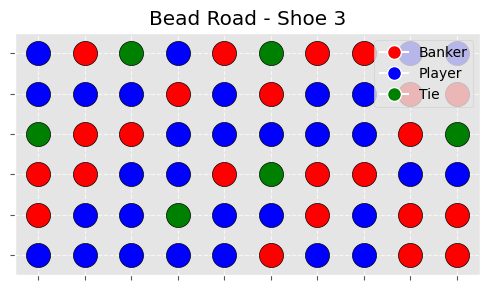

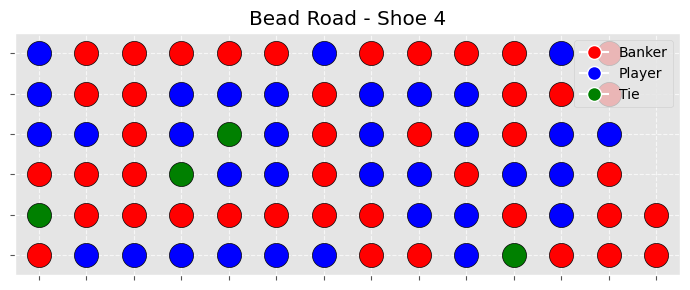

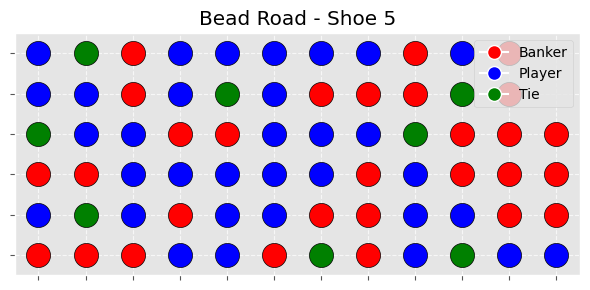

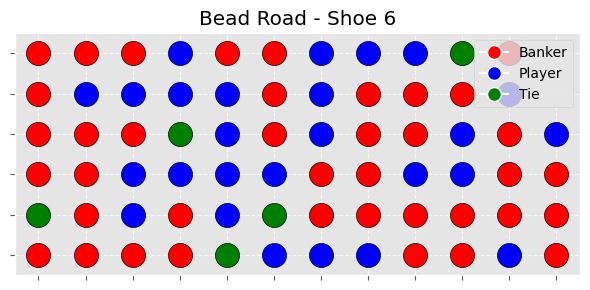

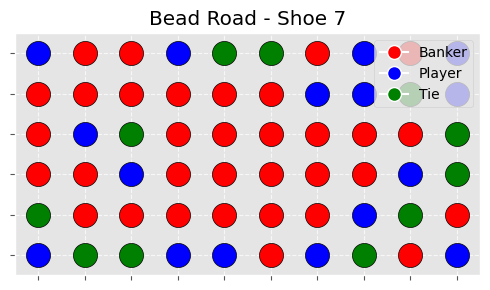

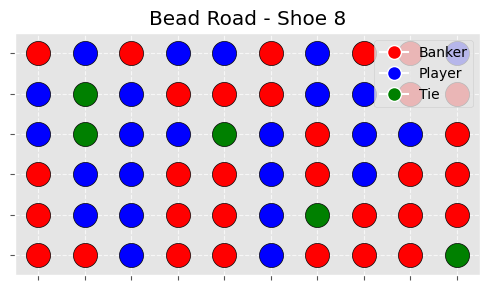

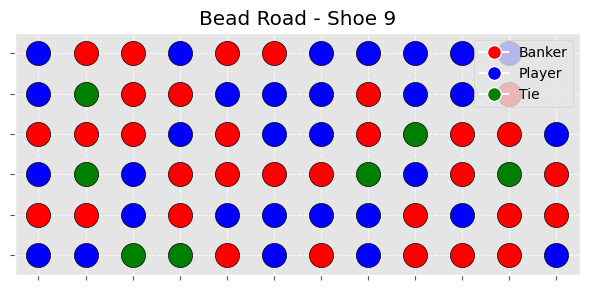

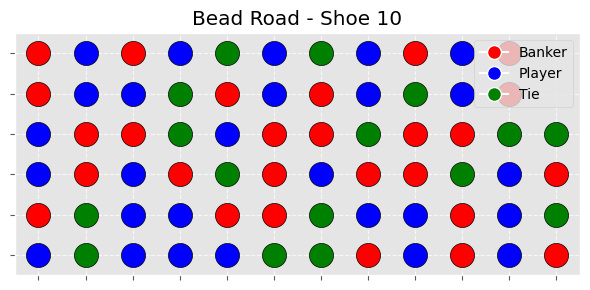

In [40]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import random

# Define bead road formatting function
def format_bead_road(results):
    num_rows = 6
    num_columns = (len(results) // num_rows) + (1 if len(results) % num_rows != 0 else 0)
    
    bead_road_matrix = [['' for _ in range(num_columns)] for _ in range(num_rows)]
    
    for i, result in enumerate(results):
        row = i % num_rows  # Cycles through rows (max 6 per column)
        col = i // num_rows  # Moves to next column after 6 rows
        bead_road_matrix[row][col] = result
    
    return bead_road_matrix

# Plot a single shoe's bead road
def plot_bead_road(bead_road_matrix, shoe_number):
    """
    Visualize the bead road as a grid of colored circles.
    - Banker: Red circle
    - Player: Blue circle
    - Tie: Green circle
    """
    rows = len(bead_road_matrix)
    cols = len(bead_road_matrix[0])
    
    fig, ax = plt.subplots(figsize=(cols * 0.5, rows * 0.5))
    
    for row_idx in range(rows):
        for col_idx in range(cols):
            result = bead_road_matrix[row_idx][col_idx]
            if result == '':  # Skip empty cells
                continue
            # Define colors based on result
            if result == "Banker wins":
                color = "red"
            elif result == "Player wins":
                color = "blue"
            elif result == "Tie":
                color = "green"
            else:
                continue  # Skip unexpected results
            
            # Plot a circle for each result
            ax.scatter(col_idx, rows - 1 - row_idx, s=300, c=color, marker="o", edgecolors="black")
    
    # Customize the plot
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f"Bead Road - Shoe {shoe_number}")
    
    # Add a legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Banker'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Player'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Tie')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match typical bead road orientation
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Shuffle and segment into random shoes (60, 70, or 80 rounds each)
    shoes = []
    all_shoes = []  # To store all shoe results
    try:
        rounds = list(bacc["Result"])  # Extract only the results (Player, Banker, Tie)
    except NameError:
        rounds = ["Player wins", "Banker wins", "Tie"] * 100  # Fallback to dummy data
        print("Using dummy data as 'bacc' is not defined.")
    
    index = 0
    shoe_number = 1

    while index < len(rounds):
        shoe_size = random.choice([60, 70, 80])  # Randomly select shoe size
        shoe_results = rounds[index:index + shoe_size]  # Get the slice of rounds for this shoe
        if not shoe_results:
            break

        # Store the shoe results
        all_shoes.append(shoe_results)

        # Only plot the bead road for the first 10 shoes
        if shoe_number <= 10:
            formatted_shoe = format_bead_road(shoe_results)
            plot_bead_road(formatted_shoe, shoe_number)
        
        index += shoe_size  # Move to the next shoe
        shoe_number += 1

### strategy 1 using beadroad

Shoe 1: Win Rate = 50.00% (Size: 70 rounds)
Shoe 2: Win Rate = 83.33% (Size: 70 rounds)
Shoe 3: Win Rate = 66.67% (Size: 60 rounds)
Shoe 4: Win Rate = 61.54% (Size: 80 rounds)
Shoe 5: Win Rate = 29.41% (Size: 70 rounds)

Overall Win Rate Across 145 Shoes: 46.54%


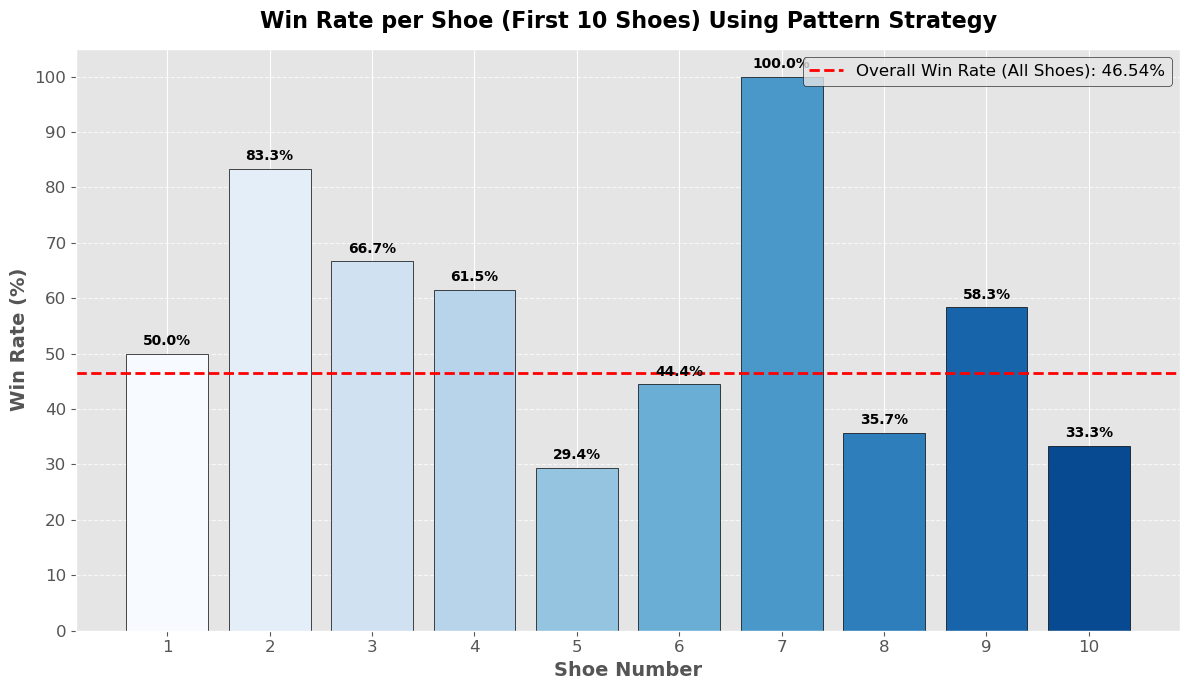

In [47]:
# Set a professional style
plt.style.use('ggplot')  

# Simple pattern strategy: Bet on Banker after two consecutive Player wins
def apply_pattern_strategy(shoe_results):
    # Convert to numpy array for vectorized operations
    shoe = np.array(shoe_results)
    outcomes = np.full(len(shoe), -1, dtype=int)  # -1 for no bet
    
    # Vectorized condition: Bet on Banker after two consecutive Player wins
    mask = (shoe[:-2] == "Player wins") & (shoe[1:-1] == "Player wins")
    bet_indices = np.where(mask)[0] + 2  # Shift by 2 for the next hand
    
    # Apply outcomes: 1 for win (Banker wins), 0 for loss
    outcomes[bet_indices] = (shoe[bet_indices] == "Banker wins").astype(int)
    
    return outcomes

# Calculate win rate using numpy
def calculate_win_rate(outcomes):
    bets_made = outcomes[outcomes != -1]  # Filter out no-bet scenarios
    if len(bets_made) == 0:
        return 0.0
    return np.mean(bets_made == 1) * 100  # Percentage of wins

# Check if all_shoes is available
if 'all_shoes' not in globals():
    raise NameError("all_shoes not found. Please define all_shoes (e.g., from bacc['Result']).")

# Convert all_shoes to a pandas DataFrame for easier management
shoes_df = pd.DataFrame({'Results': all_shoes})

# Apply strategy to all shoes using pandas apply
shoes_df['Outcomes'] = shoes_df['Results'].apply(apply_pattern_strategy)
shoes_df['Win_Rate'] = shoes_df['Outcomes'].apply(calculate_win_rate)

# Print win rates for the first 5 shoes
for idx, row in shoes_df.head(5).iterrows():
    print(f"Shoe {idx + 1}: Win Rate = {row['Win_Rate']:.2f}% (Size: {len(row['Results'])} rounds)")

# Calculate overall win rate using pandas
overall_win_rate = shoes_df['Win_Rate'].mean()
print(f"\nOverall Win Rate Across {len(shoes_df)} Shoes: {overall_win_rate:.2f}%")

# Create a professional-looking plot
fig, ax = plt.subplots(figsize=(12, 7))  # Larger figure size for clarity

# Use a gradient of blues for the bars
colors = plt.cm.Blues([i/10 for i in range(10)])
bars = ax.bar(range(1, 11), shoes_df['Win_Rate'].head(10), color=colors, edgecolor='black')

# Add overall win rate line
ax.axhline(y=overall_win_rate, color='red', linestyle='--', linewidth=2, 
           label=f'Overall Win Rate (All Shoes): {overall_win_rate:.2f}%')

# Add grid lines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Customize title and labels with larger, bold fonts
ax.set_title('Win Rate per Shoe (First 10 Shoes) Using Pattern Strategy', 
             fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Shoe Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Win Rate (%)', fontsize=14, fontweight='bold')

# Customize tick labels
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11), fontsize=12)
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(range(0, 101, 10), fontsize=12)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the legend
ax.legend(fontsize=12, loc='upper right', frameon=True, edgecolor='black')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### strategy 2 using beadroad

Created 125 shoes from the data.
Shoe 1: Win Rate = 38.24% (Size: 80 rounds)
Shoe 2: Win Rate = 50.00% (Size: 80 rounds)
Shoe 3: Win Rate = 65.38% (Size: 80 rounds)
Shoe 4: Win Rate = 45.16% (Size: 80 rounds)
Shoe 5: Win Rate = 30.77% (Size: 80 rounds)

Overall Win Rate Across 125 Shoes: 44.54%


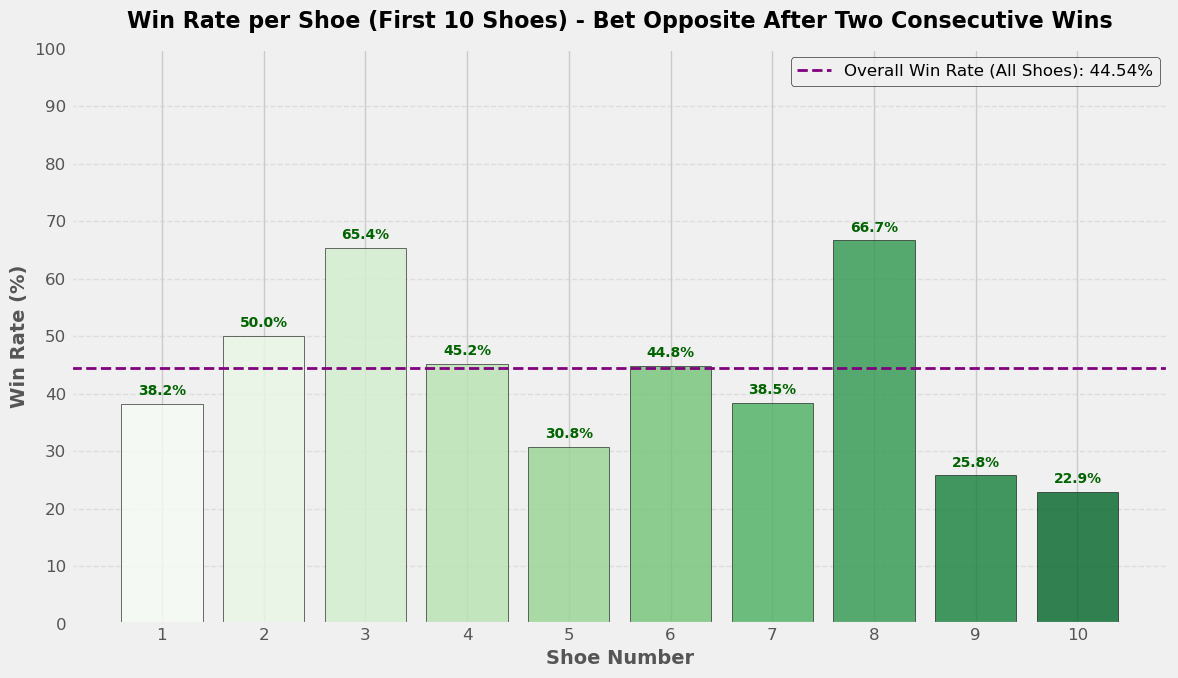

In [49]:
# Set a professional style
plt.style.use('fivethirtyeight')  # Use fivethirtyeight style for a polished look

# Load data (assuming this is your data source from earlier context)
bacc = pd.read_csv("./data/baccarat_results.csv")  # Adjust path as needed

# Define all_shoes by splitting bacc["Result"] into chunks
shoe_size = 80  # Typical Baccarat shoe size
all_shoes = [bacc["Result"][i:i + shoe_size].tolist() for i in range(0, len(bacc), shoe_size)]
print(f"Created {len(all_shoes)} shoes from the data.")

# New strategy: Bet on Player after two consecutive Banker wins, and bet on Banker after two consecutive Player wins
def apply_opposite_streak_strategy(shoe_results):
    # Convert to numpy array for vectorized operations
    shoe = np.array(shoe_results)
    outcomes = np.full(len(shoe), -1, dtype=int)  # -1 for no bet
    
    # Condition 1: Bet on Player after two consecutive Banker wins
    banker_mask = (shoe[:-2] == "Banker wins") & (shoe[1:-1] == "Banker wins")
    banker_bet_indices = np.where(banker_mask)[0] + 2  # Shift by 2 for the next hand
    outcomes[banker_bet_indices] = (shoe[banker_bet_indices] == "Player wins").astype(int)
    
    # Condition 2: Bet on Banker after two consecutive Player wins
    player_mask = (shoe[:-2] == "Player wins") & (shoe[1:-1] == "Player wins")
    player_bet_indices = np.where(player_mask)[0] + 2  # Shift by 2 for the next hand
    outcomes[player_bet_indices] = (shoe[player_bet_indices] == "Banker wins").astype(int)
    
    return outcomes

# Calculate win rate using numpy
def calculate_win_rate(outcomes):
    bets_made = outcomes[outcomes != -1]  # Filter out no-bet scenarios
    if len(bets_made) == 0:
        return 0.0
    return np.mean(bets_made == 1) * 100  # Percentage of wins

# Create a pandas DataFrame for all shoes
shoes_df = pd.DataFrame({'Results': all_shoes})
shoes_df['Outcomes'] = shoes_df['Results'].apply(apply_opposite_streak_strategy)
shoes_df['Win_Rate'] = shoes_df['Outcomes'].apply(calculate_win_rate)

# Print win rates for the first 5 shoes
for idx, row in shoes_df.head(5).iterrows():
    print(f"Shoe {idx + 1}: Win Rate = {row['Win_Rate']:.2f}% (Size: {len(row['Results'])} rounds)")

# Calculate overall win rate using pandas
overall_win_rate = shoes_df['Win_Rate'].mean()
print(f"\nOverall Win Rate Across {len(shoes_df)} Shoes: {overall_win_rate:.2f}%")

# Create a professional-looking plot with fivethirtyeight style
fig, ax = plt.subplots(figsize=(12, 7))  # Larger figure size for clarity

# Use a gradient of greens for the bars
colors = plt.cm.Greens([i/10 for i in range(10)])  # Gradient of green shades
bars = ax.bar(range(1, 11), shoes_df['Win_Rate'].head(10), color=colors, edgecolor='black', alpha=0.8)

# Add overall win rate line
ax.axhline(y=overall_win_rate, color='purple', linestyle='--', linewidth=2, 
           label=f'Overall Win Rate (All Shoes): {overall_win_rate:.2f}%')

# Add grid lines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Customize title and labels with larger, bold fonts
ax.set_title('Win Rate per Shoe (First 10 Shoes) - Bet Opposite After Two Consecutive Wins', 
             fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Shoe Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Win Rate (%)', fontsize=14, fontweight='bold')

# Customize tick labels
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11), fontsize=12)
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(range(0, 101, 10), fontsize=12)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkgreen')

# Customize the legend
ax.legend(fontsize=12, loc='upper right', frameon=True, edgecolor='black')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### Real Life Test

#### Considers real life casino rules, payouts. 

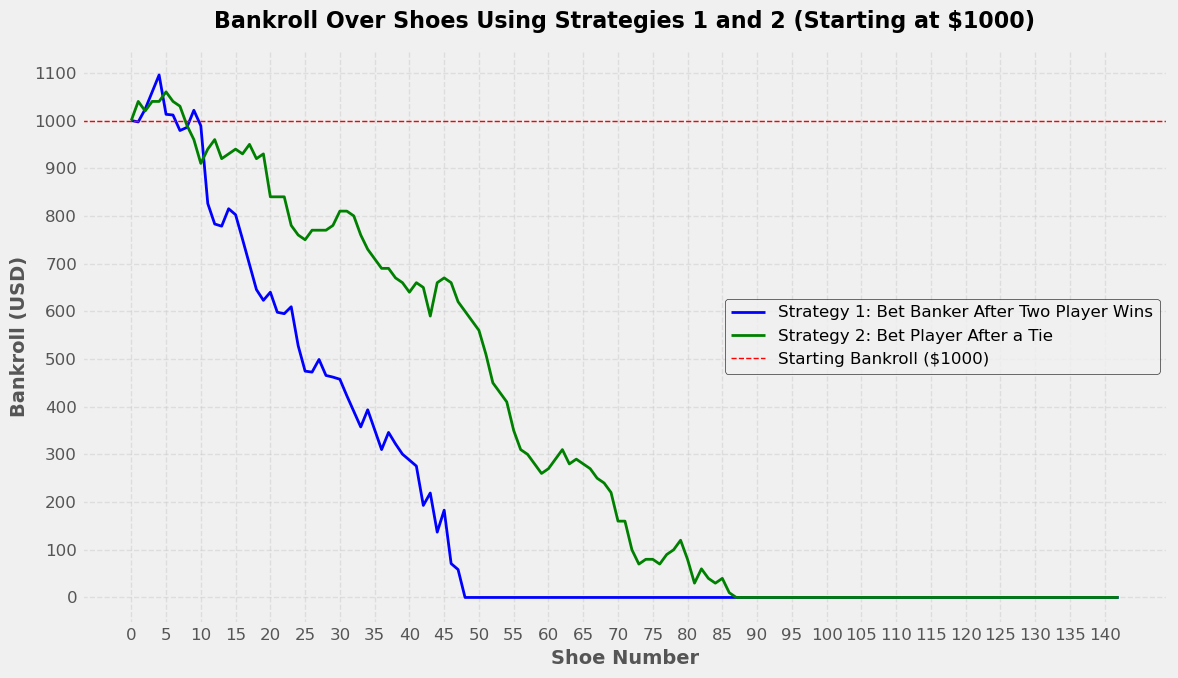

Final Bankroll for Strategy 1: $0.00
Final Bankroll for Strategy 2: $0.00


In [242]:
import matplotlib.pyplot as plt

# Set a professional style
plt.style.use('fivethirtyeight')  # Use fivethirtyeight style for consistency

# Strategy 1: Bet on Banker after two consecutive Player wins (from Cell 2)
def apply_pattern_strategy(shoe_results):
    outcomes = []
    
    for i in range(len(shoe_results)):
        if i >= 2 and shoe_results[i-2] == "Player wins" and shoe_results[i-1] == "Player wins":
            bet = "Banker wins"
        else:
            bet = None
        
        if bet is None:
            outcomes.append(-1)  # No bet
        elif bet == shoe_results[i]:
            outcomes.append(1)  # Win
        else:
            outcomes.append(0)  # Loss
    
    return outcomes

# Strategy 2: Bet on Player after a Tie (from Cell 3)
def apply_tie_player_strategy(shoe_results):
    outcomes = []
    
    for i in range(len(shoe_results)):
        if i >= 1 and shoe_results[i-1] == "Tie":
            bet = "Player wins"
        else:
            bet = None
        
        if bet is None:
            outcomes.append(-1)  # No bet
        elif bet == shoe_results[i]:
            outcomes.append(1)  # Win
        else:
            outcomes.append(0)  # Loss
    
    return outcomes

# Simulate bankroll with a given strategy
def simulate_bankroll(strategy_func, initial_bankroll, bet_amount, all_shoes):
    bankroll = initial_bankroll
    bankroll_history = [bankroll]  # Track bankroll after each shoe
    
    for shoe_results in all_shoes:
        outcomes = strategy_func(shoe_results)
        for i, outcome in enumerate(outcomes):
            if outcome == -1:  # No bet
                continue
            # Determine the bet type (Player or Banker) based on the strategy
            if strategy_func == apply_pattern_strategy:
                bet_type = "Banker"  # Strategy 1 always bets on Banker
            else:
                bet_type = "Player"  # Strategy 2 always bets on Player
            
            # Deduct the bet amount
            bankroll -= bet_amount
            if bankroll <= 0:
                bankroll = 0
                break  # Stop if bankrupt
            
            # Calculate payout based on outcome and bet type
            if outcome == 1:  # Win
                if bet_type == "Player":
                    bankroll += bet_amount * 2  # 1:1 payout (bet + win)
                elif bet_type == "Banker":
                    bankroll += bet_amount + (bet_amount * 0.95)  # 1:1 minus 5% commission
            # If outcome == 0 (loss), bankroll already reduced by bet_amount
        
        # Record bankroll after the shoe
        bankroll_history.append(bankroll)
        if bankroll <= 0:
            break  # Stop if bankrupt
    
    # Extend history if simulation stopped early due to bankruptcy
    while len(bankroll_history) <= len(all_shoes):
        bankroll_history.append(0)
    
    return bankroll_history

# Check if all_shoes is available
if 'all_shoes' not in globals():
    raise NameError("all_shoes not found. Please run the first cell to create all_shoes.")

# Simulation parameters
initial_bankroll = 1000  # Starting bankroll in USD
bet_amount = 10  # Flat bet amount per hand in USD

# Simulate bankroll for both strategies
bankroll_history_strategy1 = simulate_bankroll(apply_pattern_strategy, initial_bankroll, bet_amount, all_shoes)
bankroll_history_strategy2 = simulate_bankroll(apply_tie_player_strategy, initial_bankroll, bet_amount, all_shoes)

# Create a line plot to show bankroll over shoes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot bankroll for Strategy 1
ax.plot(range(len(all_shoes) + 1), bankroll_history_strategy1, label='Strategy 1: Bet Banker After Two Player Wins', color='blue', linewidth=2)

# Plot bankroll for Strategy 2
ax.plot(range(len(all_shoes) + 1), bankroll_history_strategy2, label='Strategy 2: Bet Player After a Tie', color='green', linewidth=2)

# Customize the plot
ax.set_title('Bankroll Over Shoes Using Strategies 1 and 2 (Starting at $1000)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Shoe Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Bankroll (USD)', fontsize=14, fontweight='bold')

# Set x-axis ticks to show every 5 shoes
ax.set_xticks(range(0, len(all_shoes) + 1, 5))
ax.set_xticklabels(range(0, len(all_shoes) + 1, 5), fontsize=12)

# Set y-axis ticks
ax.set_yticks(range(0, int(max(max(bankroll_history_strategy1), max(bankroll_history_strategy2), initial_bankroll)) + 100, 100))
ax.set_yticklabels(range(0, int(max(max(bankroll_history_strategy1), max(bankroll_history_strategy2), initial_bankroll)) + 100, 100), fontsize=12)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Add a horizontal line at the starting bankroll
ax.axhline(y=initial_bankroll, color='red', linestyle='--', linewidth=1, label='Starting Bankroll ($1000)')

# Customize the legend
ax.legend(fontsize=12, loc='best', frameon=True, edgecolor='black')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

# Print final bankroll for each strategy
print(f"Final Bankroll for Strategy 1: ${bankroll_history_strategy1[-1]:.2f}")
print(f"Final Bankroll for Strategy 2: ${bankroll_history_strategy2[-1]:.2f}")
